In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV with proper encoding
df = pd.read_csv("retail-sale-analysis.csv", encoding='latin1')

# View first few rows
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# Get number of rows, columns
df.shape


(2823, 25)

In [4]:
# View column names
df.columns



Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
# View data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
# Summary statistics (mean, min, max, etc.)
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
# Total missing values
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
df = df.fillna(0)


In [9]:
# Strip spaces and lowercase column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [11]:
df.columns.tolist()


['ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'addressline2',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize']

In [12]:
['Invoice Date', 'Product', 'Region', 'Sales']


['Invoice Date', 'Product', 'Region', 'Sales']

In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [15]:
df.columns.tolist()



['ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'addressline2',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize']

In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns.tolist()


['ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'addressline2',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize']

In [18]:
df.columns.tolist()


['ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'addressline2',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize']

In [19]:
df['orderdate'] = pd.to_datetime(df['orderdate'])


In [20]:
df['month'] = df['orderdate'].dt.month
df['year'] = df['orderdate'].dt.year


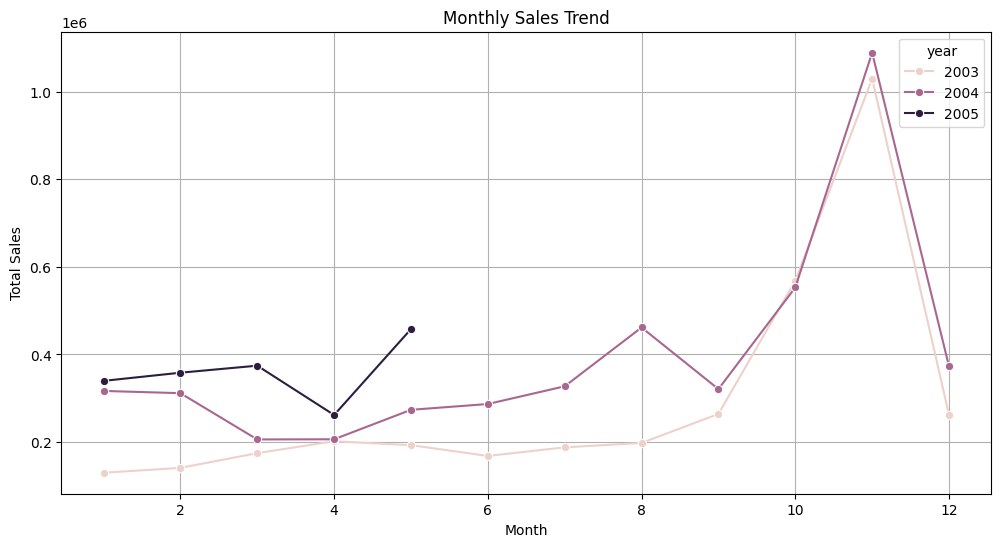

In [21]:
monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()


<Axes: title={'center': 'Monthly Sales'}, xlabel='month'>

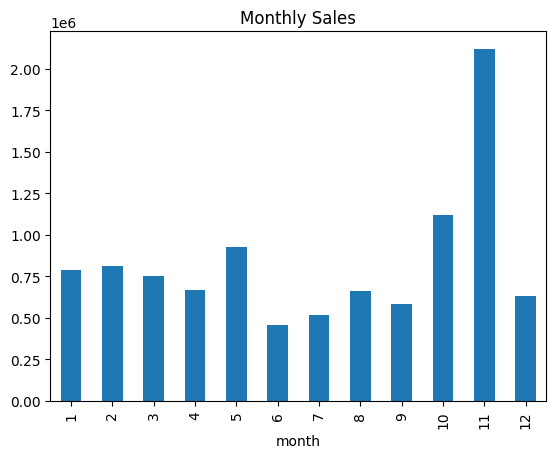

In [22]:
df.groupby('month')['sales'].sum().plot(kind='bar', title='Monthly Sales')


In [24]:
df['productcode'].unique()


array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

<Axes: title={'center': 'Top 10 Products by Sales'}, xlabel='productcode', ylabel='Total Sales'>

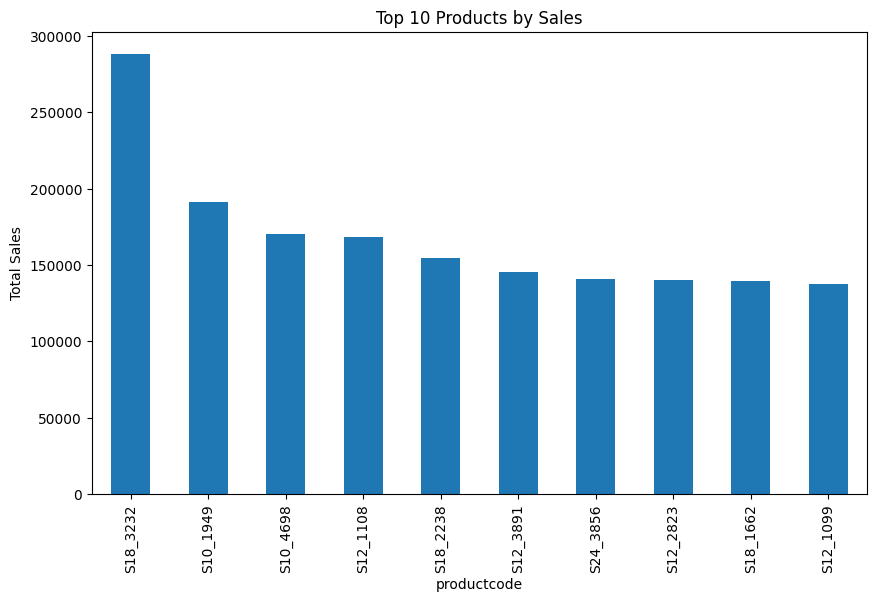

In [25]:
df.groupby('productcode')['sales'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    title='Top 10 Products by Sales',
    figsize=(10,6),
    ylabel='Total Sales'
)


<Axes: title={'center': 'Top 10 Countries by Sales'}, xlabel='country', ylabel='Total Sales'>

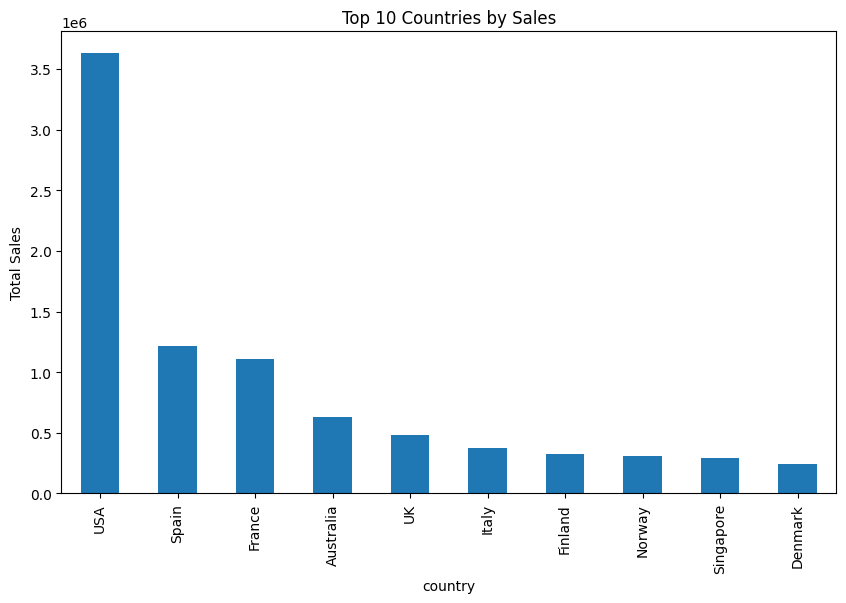

In [27]:
df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    title='Top 10 Countries by Sales',
    ylabel='Total Sales',
    figsize=(10,6)
)


In [28]:
df.to_csv("retail-sale-cleaned.csv", index=False)
